In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
trada = pd.read_csv("train.csv")
tesda = pd.read_csv("test.csv")

In [4]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [5]:
trada.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,...,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
162,163,20,RL,95.0,12182,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,Mn,BLQ,1201,Unf,0,340,1541,GasA,...,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,RFn,2,532,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,5,2010,New,Partial,220000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,...,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,943,Unf,0,0,943,GasA,...,Y,SBrkr,943,0,0,943,1,0,1,0,2,1,TA,4,Typ,2,TA,Detchd,1979.0,Unf,2,600,TA,TA,Y,42,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,210.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,1480,1500,GasA,...,Y,SBrkr,1500,0,0,1500,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,570,TA,TA,Y,192,36,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,190000


In [6]:
trada.shape, tesda.shape

((1460, 81), (1459, 80))

In [7]:
trada_id = trada['Id']
tesda_id = tesda['Id']

In [8]:
trada_id, tesda_id

(0          1
 1          2
 2          3
 3          4
 4          5
         ... 
 1455    1456
 1456    1457
 1457    1458
 1458    1459
 1459    1460
 Name: Id, Length: 1460, dtype: int64, 0       1461
 1       1462
 2       1463
 3       1464
 4       1465
         ... 
 1454    2915
 1455    2916
 1456    2917
 1457    2918
 1458    2919
 Name: Id, Length: 1459, dtype: int64)

In [9]:
trada.drop('Id', axis=1, inplace=True)
tesda.drop('Id', axis=1, inplace=True)

In [10]:
trada.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
1156,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,8,1965,1999,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,Gd,PConc,TA,TA,Gd,ALQ,633,Unf,0,586,1219,GasA,Gd,Y,SBrkr,1265,0,0,1265,0,1,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,1965.0,RFn,2,502,TA,TA,Y,0,92,0,96,0,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,179900
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
847,20,RL,36.0,15523,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,460,Unf,0,404,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,1,Fa,Attchd,1972.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,133500
914,160,FV,30.0,3000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,GLQ,294,Unf,0,318,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,173733


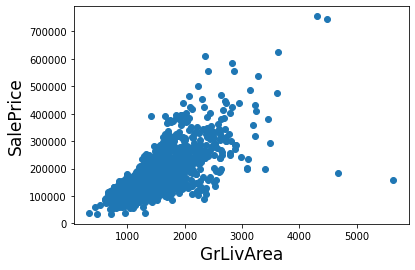

In [11]:
# oultlier Values... the last 2
fig, ax = plt.subplots()
ax.scatter(x = trada['GrLivArea'], y = trada['SalePrice'])
plt.ylabel('SalePrice', fontsize=17)
plt.xlabel('GrLivArea', fontsize=17)
plt.show()

In [12]:
trada[(trada['GrLivArea']>4000) & (trada['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


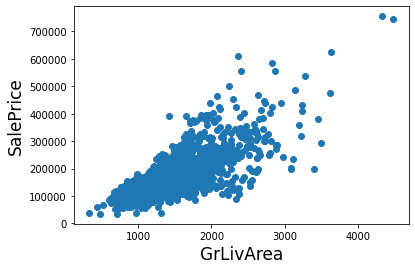

In [13]:
#Deleting outliers
trada = trada.drop(trada[(trada['GrLivArea']>4000) & (trada['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(trada['GrLivArea'], trada['SalePrice'])
plt.ylabel('SalePrice', fontsize=17)
plt.xlabel('GrLivArea', fontsize=17)
plt.show()

In [14]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


All About Target Variable.. SalePrice

mu = 180932.92 and sigma = 79467.79



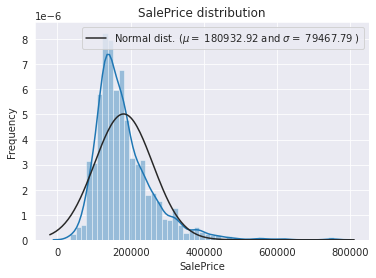

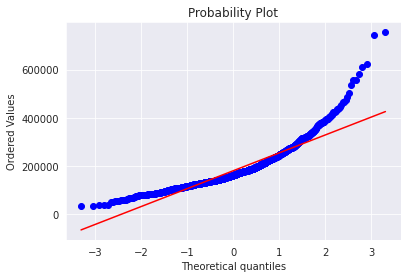


 The target variable is right skewed. As (linear) models love normally distributed data , 
 we need to transform this variable and make it more normally distributed.


In [15]:
# Flexibly plot a univariate distribution of observations using distplot
sns.distplot(trada['SalePrice'], fit=norm) 
# norm: Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
# kde: Whether to plot a gaussian kernel density estimate.

# X∼N(μ,σ2) means that the random variable X follows a normal distribution with mean μ and variance σ2.

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trada['SalePrice'])
print( 'mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
plt.figure()
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# Calculate quantiles for a probability plot, and optionally show the plot.
stats.probplot(trada['SalePrice'], plot=plt) # plot: plots the quantiles and least squares fit

plt.show()
print("\n The target variable is right skewed. As (linear) models love normally distributed data , \n \
we need to transform this variable and make it more normally distributed.")

Log-transformation of the target variable

In [16]:
#We use the numpy fuction log1p which applies log(1+x) to all elements of the column
trada["SalePrice"] = np.log(trada["SalePrice"])
p = np.log1p(trada["SalePrice"])

In [17]:
trada["SalePrice"], p

(0       12.247694
 1       12.109011
 2       12.317167
 3       11.849398
 4       12.429216
           ...    
 1455    12.072541
 1456    12.254863
 1457    12.493130
 1458    11.864462
 1459    11.901583
 Name: SalePrice, Length: 1458, dtype: float64, 0       2.583824
 1       2.573300
 2       2.589054
 3       2.553297
 4       2.597433
           ...   
 1455    2.570514
 1456    2.584364
 1457    2.602181
 1458    2.554469
 1459    2.557350
 Name: SalePrice, Length: 1458, dtype: float64)


 mu = 12.02 and sigma = 0.40



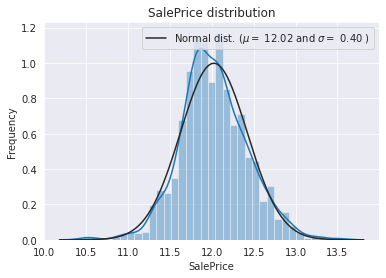

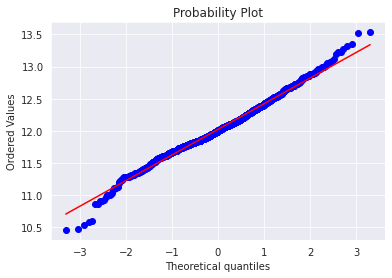

In [18]:
#Check the new distribution 
sns.distplot(trada['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trada['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
plt.figure()
stats.probplot(trada['SalePrice'], plot=plt)
plt.show()

Feature Engineering

In [19]:
ntrain = trada.shape[0]
ntest = tesda.shape[0]

y_train = trada.SalePrice.values

all_data = pd.concat((trada, tesda)).reset_index(drop=True)

all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Missing Data

In [20]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Feature by Percent missing data')

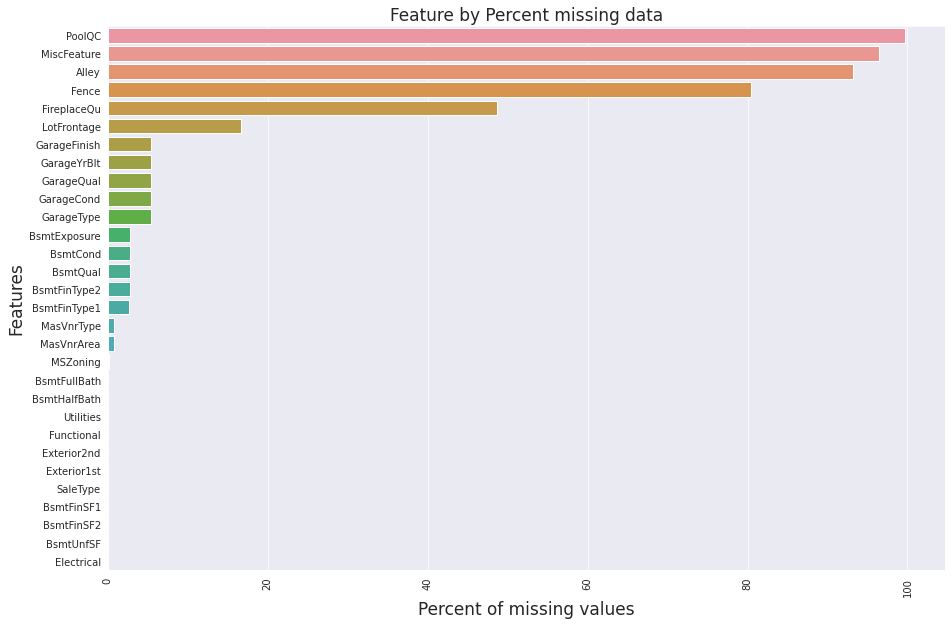

In [21]:
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na, y=all_data_na.index)
plt.xlabel('Percent of missing values', fontsize=17)
plt.ylabel('Features', fontsize=17)
plt.title('Feature by Percent missing data', fontsize=17)

Data Correlation

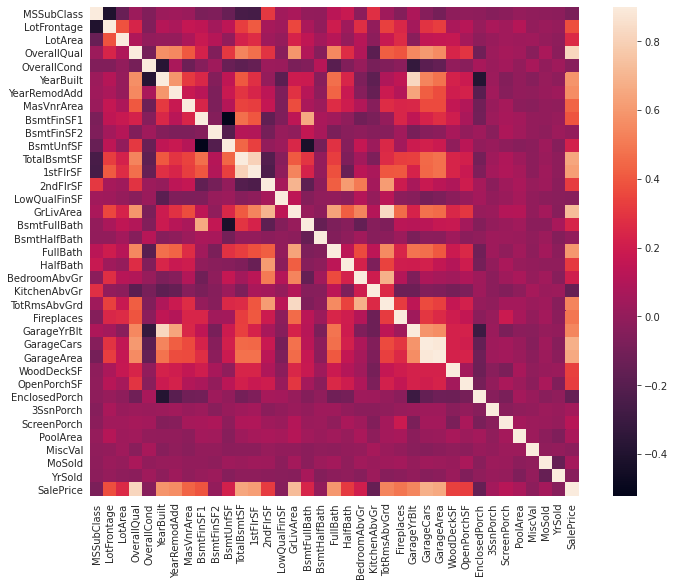

In [22]:
#Correlation map to see how features are correlated with SalePrice
corrmat = trada.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [23]:
# PoolQC : data description says NA means "No Pool"
all_data["PoolQC"] = all_data["PoolQC"].fillna("No")
# MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("No")
# Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("No")
# Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("No")

In [24]:
all_data["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

In [25]:
all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

In [26]:
""" LotFrontage : Since the area of each street connected to the house property 
most likely have a similar area to other houses in its neighborhood , 
we can fill in missing values by the median LotFrontage of the neighborhood."""
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [27]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [28]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [29]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [31]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [32]:
all_data = all_data.drop(['Utilities'], axis=1)

In [33]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [34]:
all_data['MSZoning'].mode()
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
# SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [35]:
# MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Missing Data!

In [36]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Numerical Values which are Categorical

In [37]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [39]:
"""Since area related features are very important to determine house prices, 
we add one more feature which is the total area of basement, 
first and second floor areas of each house"""

# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Skewed featured

In [40]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [41]:
"""Box Cox Transformation of (highly) skewed features
We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
Note that setting  λ=0  is equivalent to log1p used above for the target variable.
See this page for more details on Box Cox Transformation as well as the scipy function's page"""
# http://onlinestatbook.com/2/transformations/box-cox.html

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [44]:
trada = all_data[:ntrain]
tesda = all_data[ntrain:]

##MODELING

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [45]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)